<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/ROC_todos_calsificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%%timeit
from google.colab import files
import sys
sys.path.append('/content/drive/My Drive')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf
#from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192,Snippet_190, ROC_
#from ipynb.fs.full.my_functions import load_clean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Cargamos los datos

---



In [0]:
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
print ("nº de características del modelo :",len(features_))
#cargamos los datos a predecir

Cargando full
(1717, 57)
nº de características del modelo : 8


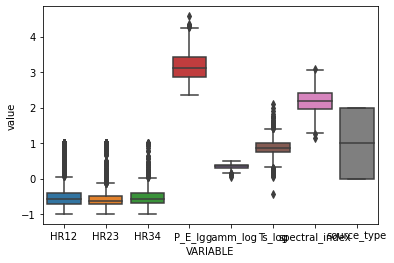

In [0]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
#sns.boxplot(df0['P_E_lg'])

df_box=df0[features_]
#df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_box))
sns.set(rc={'figure.figsize':(20,10)})
#plt.figure(figsize=(20,12))
plt.xlabel('VARIABLE')


plt.show()
#plt.savefig("/content/drive/My Drive/dispesión-variables.png")

#**Cargamos los modelos entrenados**

---



#Arbol de decision (tree)

In [0]:
import pickle
# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-3)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    tree_model = pickle.load(file)
    tree_model

#Logistic regression

In [0]:
pkl_filename = "/content/drive/My Drive/LR-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    LR_model = pickle.load(file)

# Random Forest

In [0]:
pkl_filename = "/content/drive/My Drive/forest-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    Forest_model = pickle.load(file)
    

#Support Vector Machine (SVM)

In [0]:
pkl_filename = "/content/drive/My Drive/svm-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    SVM_model = pickle.load(file)

# Gradient Boosted (GBC)

In [0]:
pkl_filename = "/content/drive/My Drive/gbc-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    GBC_model = pickle.load(file)

# Entended Boosted Trees (XGB)

In [0]:
pkl_filename = "/content/drive/My Drive/xg(1)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    XGB_model = pickle.load(file)

# Curvas ROC todos los modelos

---



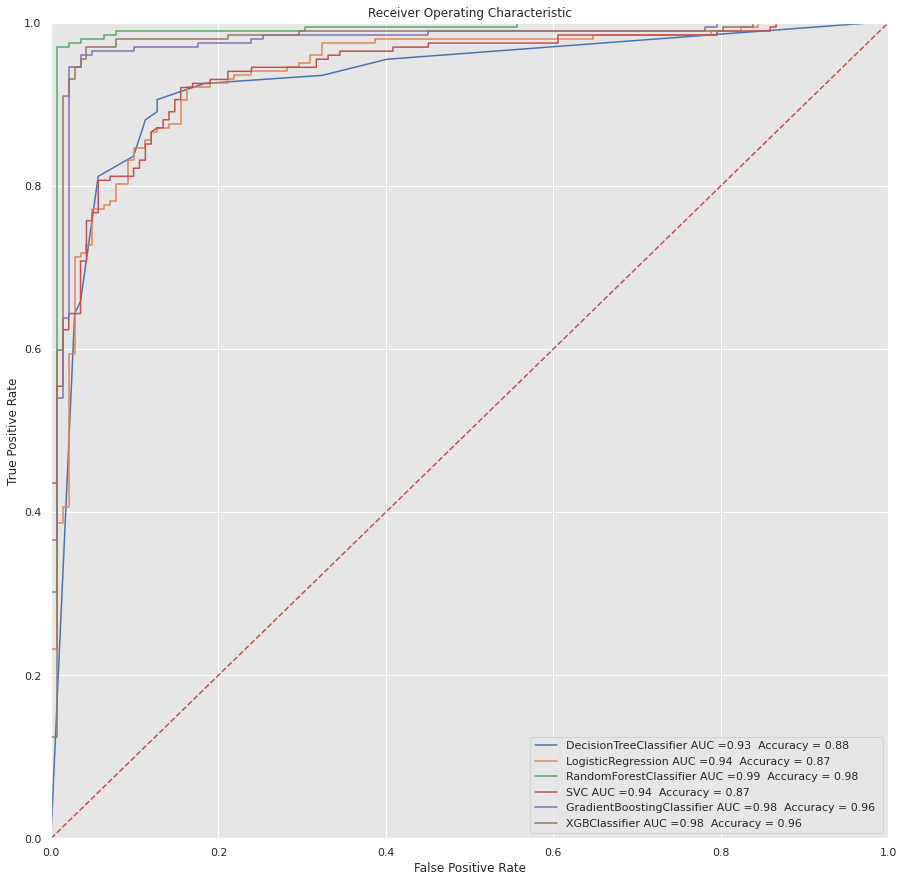

In [0]:
clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
mf.ROC_multiple(clasificadores,X_test,y_test)

In [0]:

# Curvas ROC eliminado los outliers (Pendiente)
#mf.ROC_multiple(clasificadores,X_test,y_test)
#df_2.head(3) 
def rule_tresholds(precision_treshold,recall_treshold,plot_df,name='test'):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    tmp_df = plot_df.loc[(plot_df['precision'] >= precision_treshold) & (plot_df['recall'] >= recall_treshold)]
    etiqueta='Clasificador: '+ name
    text= f'{name} TRESHOLDS Min ={recall_treshold[0]}  Max = {recall_treshold[0]}%'
    sns.lineplot(x='recall', y='precision', data=tmp_df, sort=False, estimator=None, legend='full', label=text)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    return tmp_df


## Grafico precision-recall para todos los clasificadores

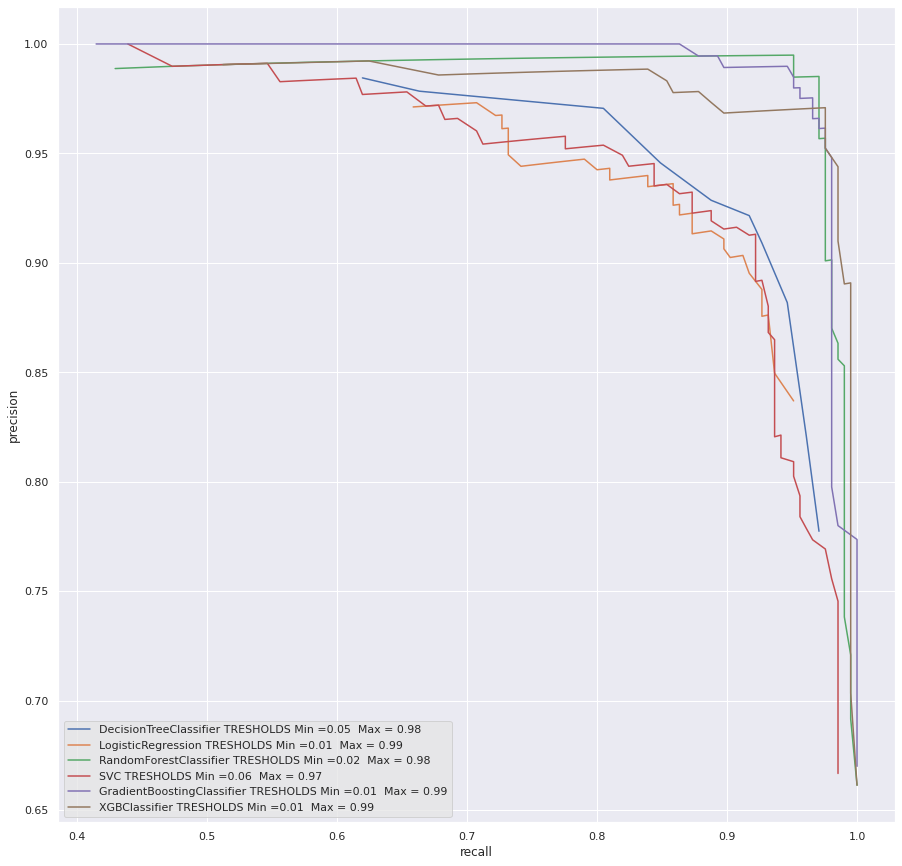

In [0]:
def plot_pre_rec(clf,X_test,y_test,pre_,rec_,etiqueta):
  y_pred=clf.predict_proba(X_test)[:,1]
  precision , recall,thresholds,mcc,f1=mf.prec_rec(0,1,100,y_test,y_pred)
  plot_df = pd.DataFrame({'recall': recall, 'precision': precision, 'threshold': thresholds,'mcc':mcc, 'f1':f1})
  #etiqueta='Clasificador: '+ name
  tmp_df=mf.rule_tresholds(pre_,rec_,plot_df, etiqueta)
  return tmp_df

for clf in clasificadores:
  etiqueta =clf.__class__.__name__
  tmp_df=plot_pre_rec(clf,X_test,y_test,0.65,0.4,etiqueta)  


In [0]:
print(tmp_df.shape)
tmp_df
x=tmp_df['mcc'].iloc[0]
print(x)
x1=tmp_df['mcc'].tail(1).item()
print(x1)
tmp_df.describe()


Gi_Date = tmp_df.loc[tmp_df["mcc"] == x]
print(Gi_Date)
tmp_df.tail(1)


## Analisis individual ( 1 clasificador)  precision-recall

0.8010521367015561
0.9215686274509803
0.9170731707317074
0.9215686274509803
0.9170731707317074
/content/drive/My Drive/prec-rec-DecisionTreeClassifier.png


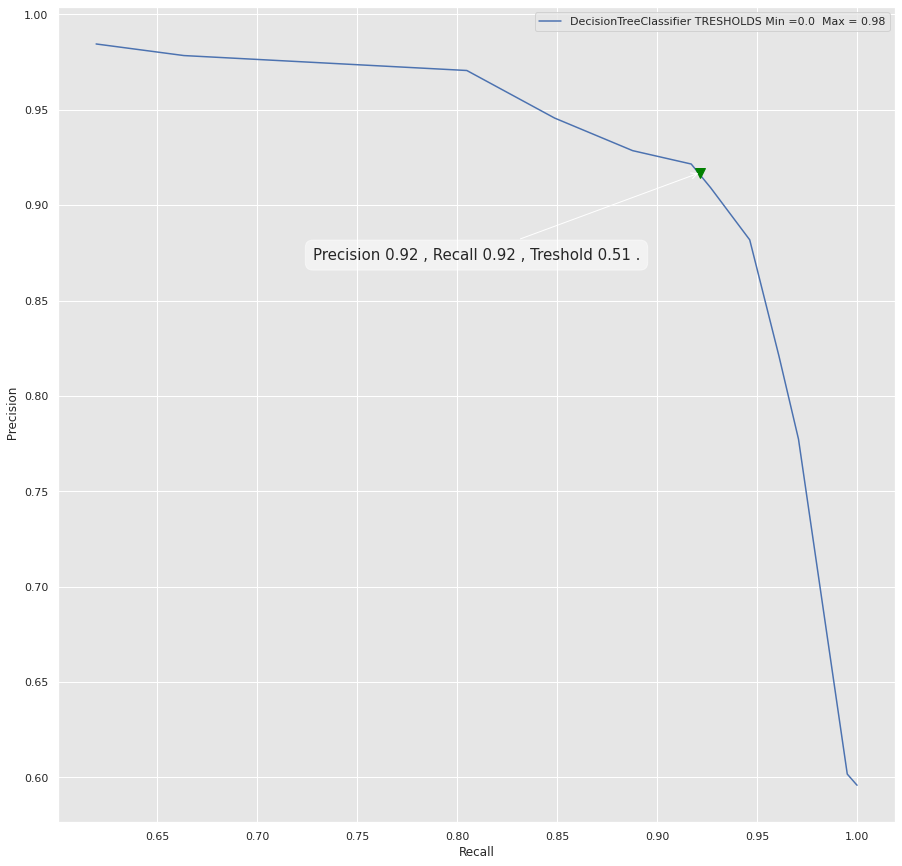

<Figure size 720x432 with 0 Axes>

(98, 5)


In [0]:
#--------------------------------------------------------------------------------
# Seleccionar uno de los siguientes modelos
#clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
#---------------------------------------------------------------------------------
clf=tree_model
name =clf.__class__.__name__
tmp_df=plot_pre_rec(clf,X_test,y_test,0.4,0.5,name)  

x=tmp_df['mcc'].max()
print(x)
T_op = tmp_df.loc[tmp_df["mcc"] == x]
tresh_=T_op['threshold'].values[0]
x_=T_op['precision'].values[0]
y_f1=T_op['recall'].values[0]
print(x_)
print(y_f1)
#x_=T_op['threshold'].values[0]
#y_f1=T_op['f1'].values[0]
#y_mcc=T_op['mcc'].values[0]
print(x_)
print(y_f1)
f1_label = f"Precision {round(x_,2)} , Recall {round(y_f1,2)} , Treshold {round(tresh_,2)} ."

plt.plot(x_, y_f1, marker='v', markersize=10, color="green")
plt.annotate(f1_label, (x_, y_f1),xytext=(-60, -90), fontsize=15,textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.ylabel(' Precision')
plt.xlabel('Recall')

fig = plt.figure(figsize=(10,6))
name =clf.__class__.__name__
archivo="/content/drive/My Drive/prec-rec-"+name+".png"
#archivo = f"Precision {round(x_,2)} , Recall {round(y_f1,2)} , Treshold {round(tresh_,2)} ."
print(archivo)
fig.savefig(archivo)
plt.show()
print(tmp_df.shape)



In [0]:
#y_test subconjunto d eetiquetas para entrenamiento.
#high_precision_threshold threshold para modelo centrado en precision
#high_recall_threshold threshold para modelo centrado en recall
from sklearn.metrics import f1_score, matthews_corrcoef
def prec_rec_thresholded(y_test,y_pred,high_precision_threshold,high_recall_threshold):
  y_pred_high_precision = np.zeros_like(y_test)
  y_pred_high_precision[y_pred >= high_precision_threshold] = 1
  y_pred_high_recall = np.zeros_like(y_test)
  y_pred_high_recall[y_pred >= high_recall_threshold] = 1
  return  y_pred_high_precision, y_pred_high_recall
  
y_pred=clf.predict_proba(X_test)[:,1]  
y_pred_hp,y_pred_hc=prec_rec_thresholded(y_test,y_pred,0.7,0.9)
#print(y_pred_hp)
#print("-------------------------------------------")
#print(y_pred_hc)
f1_score(y_test, y_pred_hp)
#f1_score(y_test, y_pred_hc)
tmp_df.head(3)


0.5050505050505051
0.9193154034229828


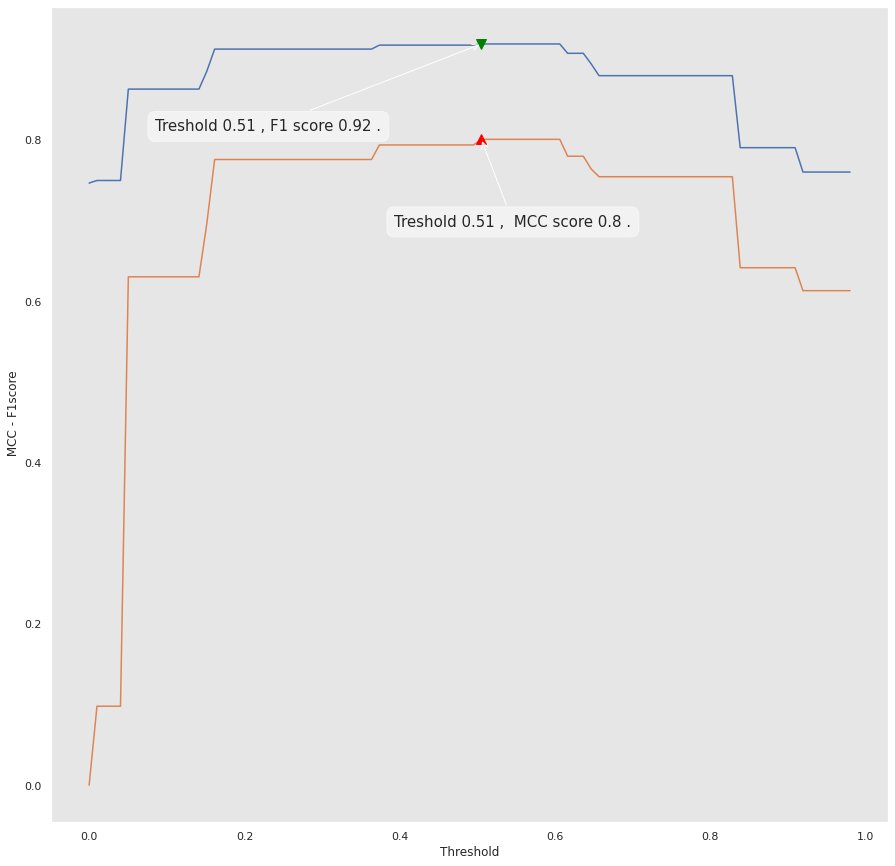

<Figure size 720x432 with 0 Axes>

(98, 5)


In [0]:
plt.grid()
#fig = plt.figure()

plt.plot(tmp_df['threshold'],tmp_df['f1'])
plt.plot(tmp_df['threshold'],tmp_df['mcc'])
T_op = tmp_df.loc[tmp_df["mcc"] == x]
#T_op['precision'].values[0]
#T_op['recall'].values[0]
x_=T_op['threshold'].values[0]
y_f1=T_op['f1'].values[0]
y_mcc=T_op['mcc'].values[0]
print(x_)
print(y_f1)
f1_label = f"Treshold {round(x_,2)} , F1 score {round(y_f1,2)} ."
mcc_label=f"Treshold {round(x_,2)} ,  MCC score {round(y_mcc,2)} ."
plt.plot(x_, y_f1, marker='v', markersize=10, color="green")
plt.annotate(f1_label, (x_, y_f1),xytext=(-100, -90), fontsize=15,textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.plot(x_, y_mcc, marker='^', markersize=10, color="red")
plt.annotate(mcc_label, (x_, y_mcc),xytext=(150, -90), fontsize=15,textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.ylabel(' MCC - F1score')
plt.xlabel('Threshold')

fig = plt.figure(figsize=(10,6))

plt.show()
print(tmp_df.shape)






In [0]:
# compute the metrics for the two points
high_precision_threshold = tmp_df.loc[9, 'threshold']
high_recall_threshold = tmp_df.loc[20, 'threshold']
print(high_precision_threshold, high_recall_threshold)


0.09090909090909091 0.20202020202020204


In [0]:
# let us compute the metrics for these thresholds

y_pred_high_precision = np.zeros_like(y_test)
y_pred_high_precision[y_pred >= high_precision_threshold] = 1
y_pred_high_recall = np.zeros_like(y_test)
y_pred_high_recall[y_pred >= high_recall_threshold] = 1

In [0]:
y_pred_high_precision

In [0]:
from sklearn.metrics import f1_score, matthews_corrcoef

In [0]:
f1_score(y_test, y_pred_high_precision), f1_score(y_test, y_pred_high_recall)

(0.8633405639913232, 0.9129411764705883)

# Metrica para la evaluación de los modelos

---



In [0]:
def multi_class_classification(clf,data_X,data_Y,cv):
    
    from sklearn.model_selection import cross_val_predict
    import sklearn.metrics as met

    #svc = svm.SVC(C=1, kernel='linear')
    # X_train, X_test, y_train, y_test = train_test_split( data_X, data_Y, test_size=0.4, random_state=0) 
    clf=clf
    #clf = svc.fit(data_X, data_Y) #svm
    # array = svc.coef_
    # print array
    predicted = cross_val_predict(clf, data_X, data_Y, cv=cv)
    print ("accuracy : ",met.accuracy_score(data_Y, predicted))
    print ("f1 score macro : ",met.f1_score(data_Y, predicted, average='macro')) 
    print ("f1 score micro : ",met.f1_score(data_Y, predicted, average='micro')) 
    print ("precision score : ",met.precision_score(data_Y, predicted, average='macro')) 
    print ("recall score : ",met.recall_score(data_Y, predicted, average='macro') )
    print ("hamming_loss : ",met.hamming_loss(data_Y, predicted))
    print ("jaccard_similarity_score : ", met.jaccard_similarity_score(data_Y, predicted))
    #print ("log_loss", met.log_loss(data_Y, predicted))
    print ("zero_one_loss : ", met.zero_one_loss(data_Y, predicted))
    print ("AUC&ROC : ",met.roc_auc_score(data_Y, predicted))
    print ("(MCC) matthews_corrcoef : ", met.matthews_corrcoef(data_Y, predicted) )
    return met.classification_report(data_Y, predicted)
clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
#for clf in clasificadores:
#  name =clf.__class__.__name__
#  print("Clasificador :", name)
#----------------------------------------------------------#  
#  report_=multi_class_classification(clf,X_test,y_test,3)  
#  print(report_)
#  print("_______________________________________________________________________________________")
#  print("")

# ISOLATION FOREST

---


## Detecta elementos anómalos en la base de datos
>Uso -> anomalos,normales=mf.iso_tree(Caracteristicas,etiquetas)

> clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

### Deteccion de elementos anómalos en la base de datos sin catalogar (BCU)


> Aparecen 69 anomalos(-1) frente a 504 normales (1)



<class 'numpy.ndarray'>
 1    504
-1     69
Name: anomaly, dtype: int64


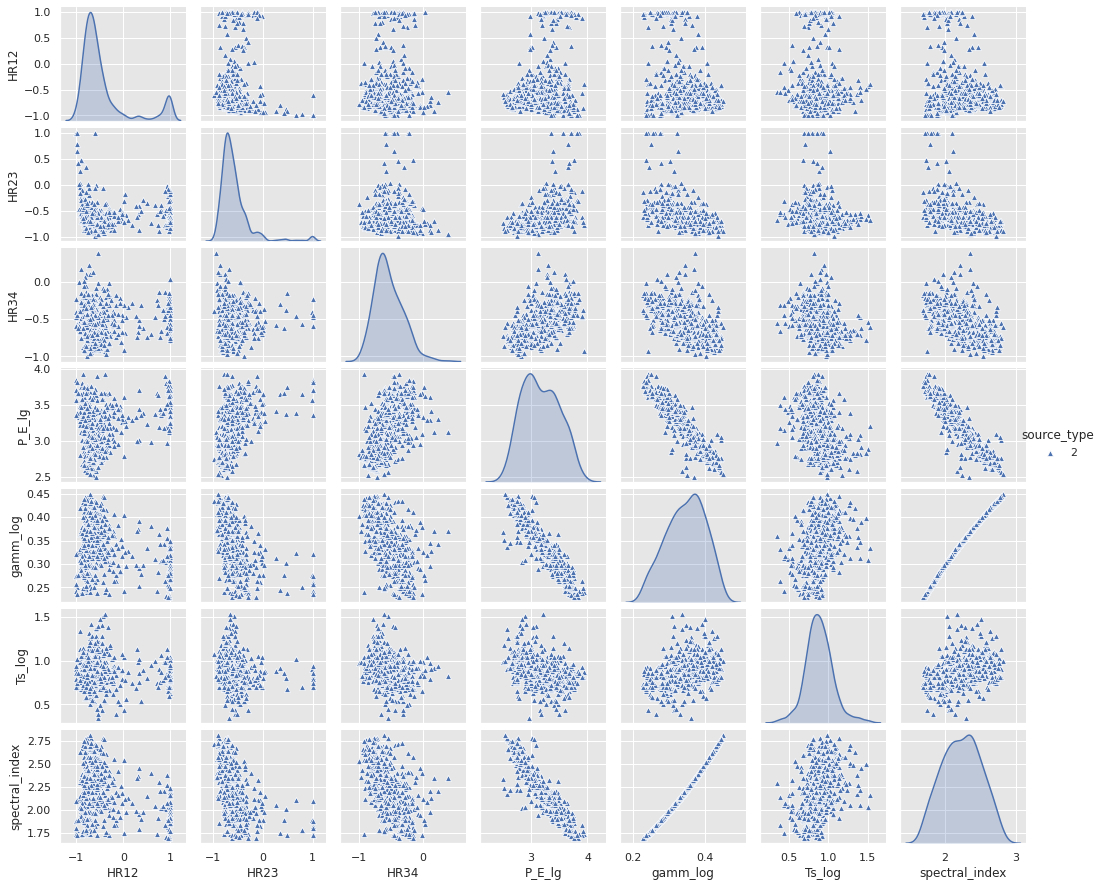

In [0]:
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
y_UNK=df_UNK['source_type']
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
df_UNK=df_UNK[features_]
#df_UNK_short.drop(columns=['source_type'], axis=1)
type(y_)
# Ouliers en dataframe con blazars sin clasificar (BCU)
anomalos,normales=mf.iso_tree(df_UNK,y_UNK)
#sns.pairplot(anomalos,hue='source_type',markers=["+" , "^"])
g=sns.pairplot(normales, hue='source_type', vars=features_ , markers=["^"])

g.fig.set_size_inches(15,12)

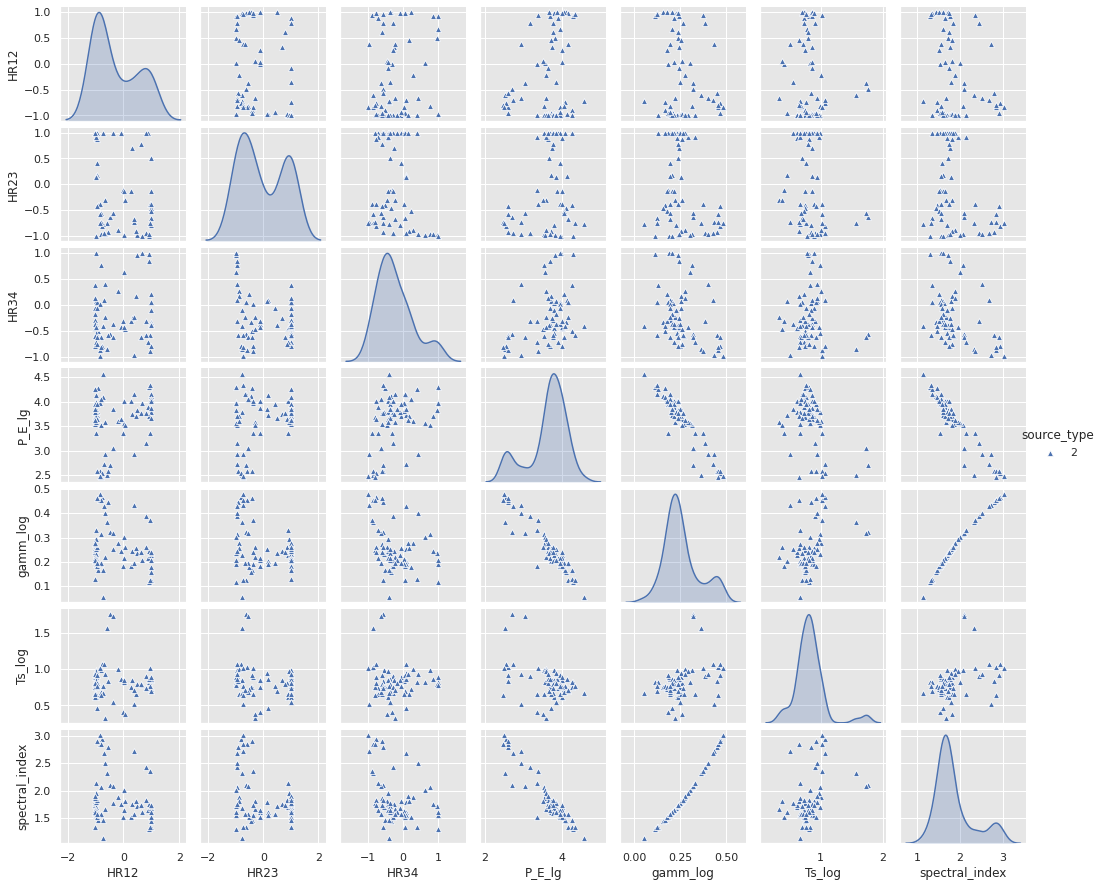

In [0]:
g=sns.pairplot(anomalos, hue='source_type', vars=features_ , markers=["^"])

g.fig.set_size_inches(15,12)

### Detección de elementos anómalos en la BBDD clasificada (BL lac & FSRQ)
> Aparecen 138 anómalos (-1) frente a 1006 normales (1)
>>Comparando con el conjunto de datos anterior parece que se conserva la proporcion anomalos/normales en amas bases de datos

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


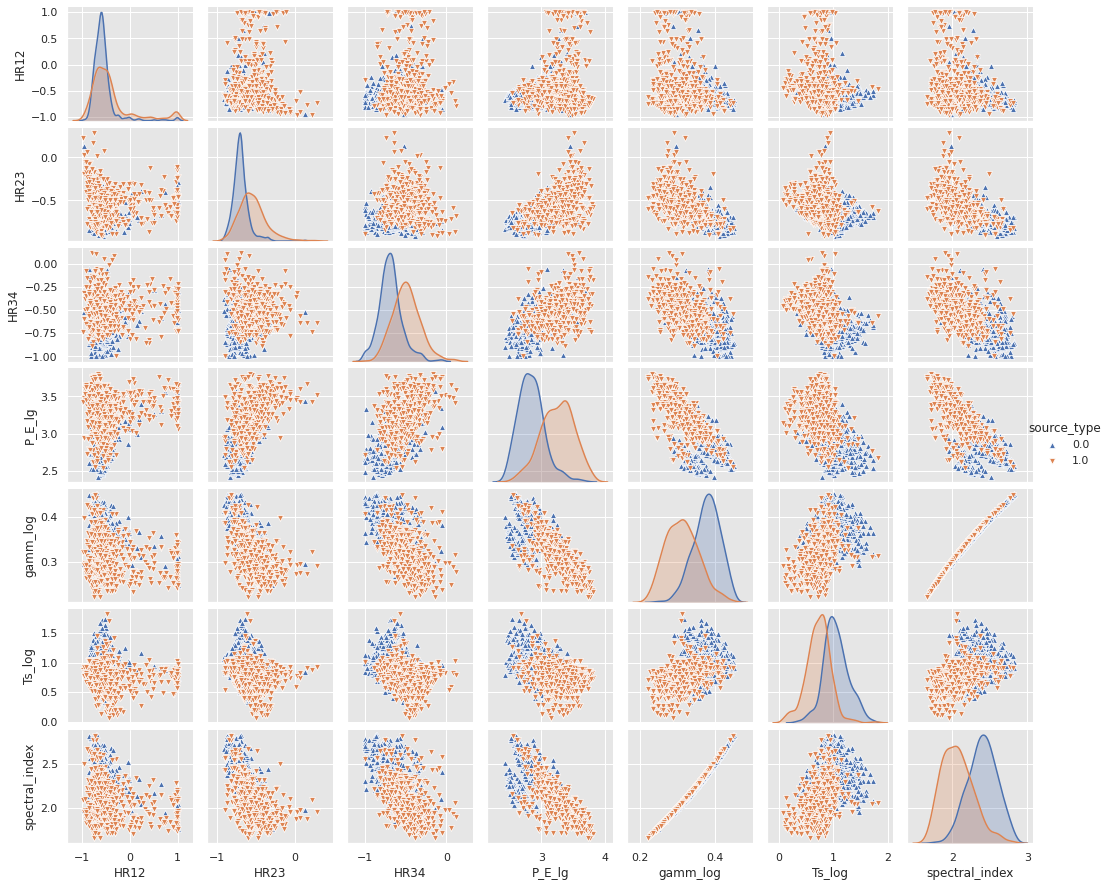

In [0]:
# Ouliers en dataframe con blazars clasificados (BLL Lac & FSRQ)
anomalos,normales=mf.iso_tree(X,y_)
g=sns.pairplot(normales, hue='source_type', vars=features_ , markers=["^","v"])

g.fig.set_size_inches(15,12)

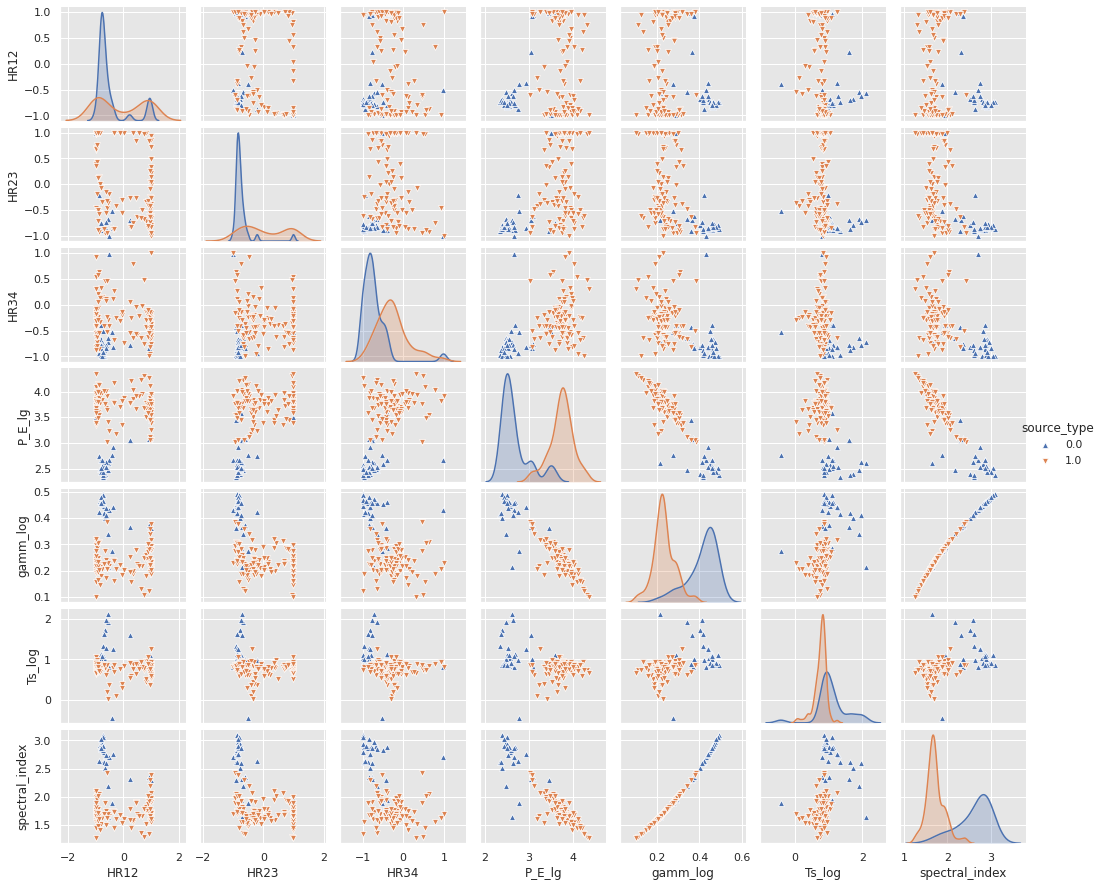

In [0]:
g=sns.pairplot(anomalos, hue='source_type', vars=features_ , markers=["^", "v"])

g.fig.set_size_inches(15,12)

In [0]:
#Curvas ROC con normales
#normales.head(3)
#feat_=['HR12',	'HR23',	'HR34',	'P_E_lg',	'gamm_log',	'Ts_log',	'spectral_index']
#y_=normales['source_type']
#normales=normales[feat_]
#sc = StandardScaler()
#sc.fit(normales)
#sc.fit(y_)
#normales = sc.transform(normales)
#mf.ROC_multiple(clasificadores,normales,y_)


In [0]:
def plot_pre_rec(clf,X_test,y_test,pre_,rec_):
          #for clf in clasificadores:
        # calculate the fpr and tpr for all thresholds of the classification
          
          y_pred=clf.predict_proba(X_test)[:,1]
          #y_pred
          precision , recall,thresholds,f1,mcc=mf.prec_rec(0,1,48,y_test,y_pred)
          plot_df = pd.DataFrame({'recall': recall, 'precision': precision, 'threshold': thresholds})
          tmp_df=mf.rule_tresholds(pre_,rec_,plot_df)
          #print (score_1)
          # method I: plt
    

          
          #plt.legend(loc = 'lower right')

plot_pre_rec(XGB_model,X_test,y_test,0.0,0.0)  

In [0]:
anomalos,normales=mf.iso_tree(X,y_)
normales.shape[0]

In [0]:

anomalos,normales=mf.iso_tree(X,y_)
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
while normales.shape[0]  >= 100:
    y_normales=normales['source_type']
    normales_=normales[features_]
    y_anomalos=anomalos['source_type']
    anomalos_=anomalos[features_]
    clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
    mf.ROC_multiple(XGB_model,anomalos_,y_anomalos)
    #tmp_df=plot_pre_rec(Forest_model,anomalos_,y_anomalos,0.6,0.6)
    anomalos,normales=mf.iso_tree(normales_,y_normales)    

    #print(normales.shape[0])
print("Programa terminado")